## split dataset

In [1]:
import os
import shutil
from pathlib import Path
import numpy as np

def read_yolo_label(label_path):
    """Read YOLO label file and return class indices."""
    with open(label_path, 'r') as f:
        lines = f.readlines()
    class_indices = set()
    for line in lines:
        if line.strip():
            class_idx = int(line.split()[0])
            class_indices.add(class_idx)
    return class_indices

def separate_classes(base_dir, split_type):
    """Separate images and labels by class for a given split (train/val)."""
    images_dir = Path(base_dir) / split_type / 'images'
    labels_dir = Path(base_dir) / split_type / 'labels'
    
    # Create dictionary to store class information
    class_files = {}
    
    # Process each label file
    for label_file in labels_dir.glob('*.txt'):
        image_name = label_file.stem
        image_file = images_dir / f"{image_name}.jpg"  # Assuming jpg format, modify if needed
        
        # Skip if image doesn't exist
        if not image_file.exists():
            print(f"Warning: No matching image for {label_file}")
            continue
            
        # Get class indices from label file
        class_indices = read_yolo_label(label_file)
        
        # Add files to corresponding classes
        for class_idx in class_indices:
            if class_idx not in class_files:
                class_files[class_idx] = []
            class_files[class_idx].append((image_file, label_file))
    
    # Create directories and copy files
    for class_idx in class_files:
        # Create class directories
        class_dir = Path(base_dir) / split_type / f'class{class_idx}'
        class_images_dir = class_dir / 'images'
        class_labels_dir = class_dir / 'labels'
        
        os.makedirs(class_images_dir, exist_ok=True)
        os.makedirs(class_labels_dir, exist_ok=True)
        
        # Copy files
        for image_file, label_file in class_files[class_idx]:
            shutil.copy2(image_file, class_images_dir / image_file.name)
            shutil.copy2(label_file, class_labels_dir / label_file.name)
            
        print(f"{split_type}/class{class_idx}: {len(class_files[class_idx])} files")

def main():
    base_dir = 'D:/dsds'  # Change this to your dataset path
    
    # Process both train and val splits
    for split_type in ['train', 'val']:
        print(f"\nProcessing {split_type} split:")
        separate_classes(base_dir, split_type)

if __name__ == "__main__":
    main()


Processing train split:
train/class15: 215 files
train/class11: 347 files
train/class22: 285 files
train/class12: 241 files
train/class30: 336 files
train/class23: 171 files
train/class0: 284 files
train/class25: 242 files
train/class24: 238 files
train/class26: 202 files
train/class1: 346 files
train/class28: 211 files
train/class27: 180 files
train/class29: 182 files
train/class2: 349 files
train/class7: 317 files
train/class17: 284 files
train/class33: 201 files
train/class19: 253 files
train/class3: 317 files
train/class34: 208 files
train/class14: 156 files
train/class13: 186 files
train/class4: 346 files
train/class31: 178 files
train/class16: 268 files
train/class6: 342 files
train/class5: 342 files
train/class35: 127 files
train/class9: 334 files
train/class32: 236 files
train/class8: 289 files
train/class18: 296 files
train/class20: 218 files
train/class21: 213 files
train/class10: 105 files

Processing val split:
val/class15: 105 files
val/class11: 90 files
val/class22: 80 f

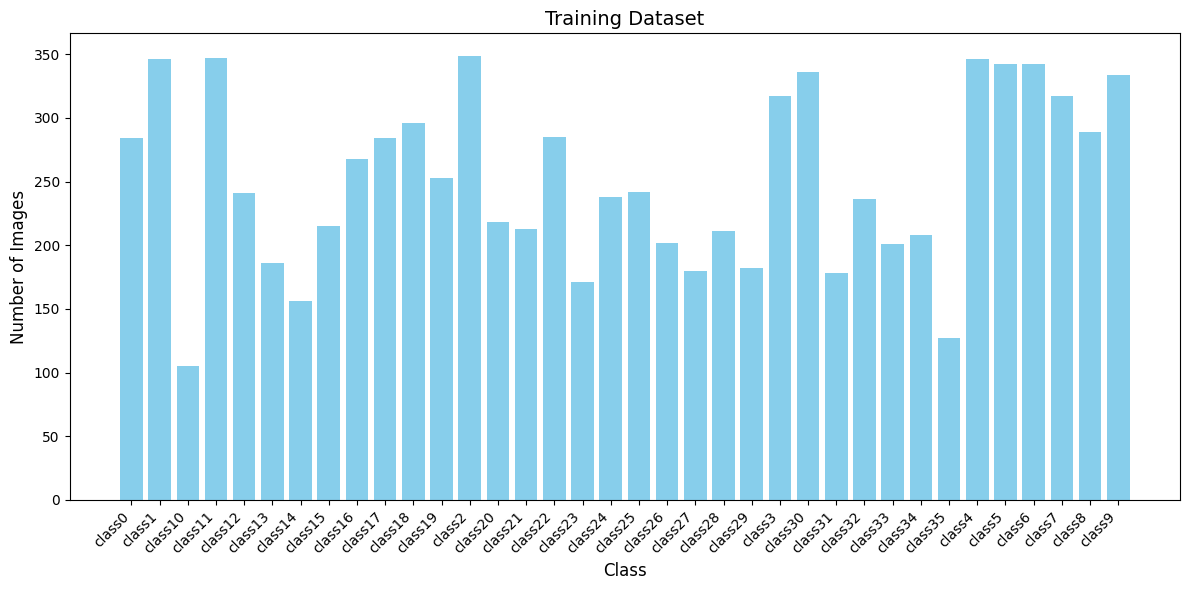

In [6]:
import os
import matplotlib.pyplot as plt

# Path to your training dataset
train_dir = "D:/dsds/train"

# Count images per class
class_counts = {}

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name, "images")
    if os.path.isdir(class_path):
        class_counts[class_name] = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])

# Sort the counts for better visualization
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[0]))

# Plot the chart
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Training Dataset", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()


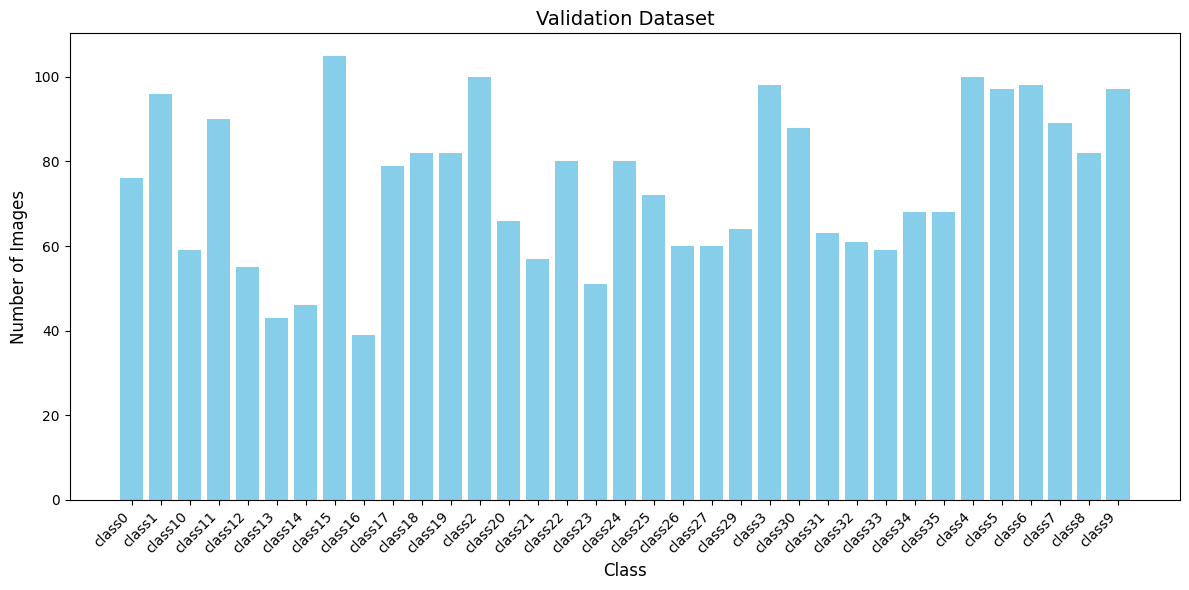

In [7]:
import os
import matplotlib.pyplot as plt

# Path to your training dataset
train_dir = "D:/dsds/val"

# Count images per class
class_counts = {}

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name, "images")
    if os.path.isdir(class_path):
        class_counts[class_name] = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])

# Sort the counts for better visualization
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[0]))

# Plot the chart
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Validation Dataset", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()


# For Rotate 

## Checking for Train Dataset (Get the highest class)

In [8]:
import os

# Path to your training dataset
train_dir = "D:/dsds/train"

# Count images per class
class_counts = {}
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name, "images")
    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        class_counts[class_name] = num_images
        print(f"Class '{class_name}': {num_images} images")

# Print total number of images
total_images = sum(class_counts.values())
print("\nTotal number of images:", total_images)

Class 'class0': 284 images
Class 'class1': 346 images
Class 'class10': 105 images
Class 'class11': 347 images
Class 'class12': 241 images
Class 'class13': 186 images
Class 'class14': 156 images
Class 'class15': 215 images
Class 'class16': 268 images
Class 'class17': 284 images
Class 'class18': 296 images
Class 'class19': 253 images
Class 'class2': 349 images
Class 'class20': 218 images
Class 'class21': 213 images
Class 'class22': 285 images
Class 'class23': 171 images
Class 'class24': 238 images
Class 'class25': 242 images
Class 'class26': 202 images
Class 'class27': 180 images
Class 'class28': 211 images
Class 'class29': 182 images
Class 'class3': 317 images
Class 'class30': 336 images
Class 'class31': 178 images
Class 'class32': 236 images
Class 'class33': 201 images
Class 'class34': 208 images
Class 'class35': 127 images
Class 'class4': 346 images
Class 'class5': 342 images
Class 'class6': 342 images
Class 'class7': 317 images
Class 'class8': 289 images
Class 'class9': 334 images

T

## Checking for Val Dataset

In [9]:
import os

# Path to your training dataset
train_dir = "D:/dsds/val"

# Count images per class
class_counts = {}
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name, "images")
    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        class_counts[class_name] = num_images
        print(f"Class '{class_name}': {num_images} images")

# Print total number of images
total_images = sum(class_counts.values())
print("\nTotal number of images:", total_images)

Class 'class0': 76 images
Class 'class1': 96 images
Class 'class10': 59 images
Class 'class11': 90 images
Class 'class12': 55 images
Class 'class13': 43 images
Class 'class14': 46 images
Class 'class15': 105 images
Class 'class16': 39 images
Class 'class17': 79 images
Class 'class18': 82 images
Class 'class19': 82 images
Class 'class2': 100 images
Class 'class20': 66 images
Class 'class21': 57 images
Class 'class22': 80 images
Class 'class23': 51 images
Class 'class24': 80 images
Class 'class25': 72 images
Class 'class26': 60 images
Class 'class27': 60 images
Class 'class29': 64 images
Class 'class3': 98 images
Class 'class30': 88 images
Class 'class31': 63 images
Class 'class32': 61 images
Class 'class33': 59 images
Class 'class34': 68 images
Class 'class35': 68 images
Class 'class4': 100 images
Class 'class5': 97 images
Class 'class6': 98 images
Class 'class7': 89 images
Class 'class8': 82 images
Class 'class9': 97 images

Total number of images: 2610


## Augmentation Process for Training Dataset

In [10]:
import os
import cv2
import numpy as np
from pathlib import Path
import shutil

def create_augmented_directories(base_dir):
    """Create a new directory structure for augmented data."""
    augmented_dir = os.path.join(os.path.dirname(base_dir), base_dir.split('/')[-1] + '_augmented')
    if os.path.exists(augmented_dir):
        shutil.rmtree(augmented_dir)
    os.makedirs(augmented_dir)
    return augmented_dir

def setup_class_directories(augmented_dir, class_name):
    """Setup directories for a specific class."""
    class_dir = os.path.join(augmented_dir, class_name)
    images_dir = os.path.join(class_dir, 'images')
    labels_dir = os.path.join(class_dir, 'labels')
    
    os.makedirs(images_dir, exist_ok=True)
    os.makedirs(labels_dir, exist_ok=True)
    
    return images_dir, labels_dir

def rotate_box(box, angle, image_width, image_height):
    """Rotate a YOLO bounding box."""
    # Convert YOLO format to absolute coordinates
    x_center, y_center = box[1] * image_width, box[2] * image_height
    width, height = box[3] * image_width, box[4] * image_height
    
    # Calculate corners
    x1 = x_center - width/2
    y1 = y_center - height/2
    x2 = x_center + width/2
    y2 = y_center + height/2
    
    # Create rotation matrix
    center = (image_width/2, image_height/2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    # Rotate corners
    points = np.array([[x1, y1], [x2, y1], [x2, y2], [x1, y2]], dtype=np.float32)
    rotated_points = np.array([rotation_matrix.dot([p[0], p[1], 1]) for p in points])
    
    # Get new bounding box
    x_min = np.min(rotated_points[:, 0])
    y_min = np.min(rotated_points[:, 1])
    x_max = np.max(rotated_points[:, 0])
    y_max = np.max(rotated_points[:, 1])
    
    # Convert back to YOLO format
    new_x_center = (x_min + x_max) / 2 / image_width
    new_y_center = (y_min + y_max) / 2 / image_height
    new_width = (x_max - x_min) / image_width
    new_height = (y_max - y_min) / image_height
    
    # Clip values to ensure they stay within [0, 1]
    new_x_center = np.clip(new_x_center, 0, 1)
    new_y_center = np.clip(new_y_center, 0, 1)
    new_width = np.clip(new_width, 0, 1)
    new_height = np.clip(new_height, 0, 1)
    
    return [box[0], new_x_center, new_y_center, new_width, new_height]

def augment_class(original_class_path, augmented_class_dirs, target_count, angles=[90, 180, 270]):
    """Augment images and labels for a specific class until reaching target count."""
    images_path = os.path.join(original_class_path, "images")
    labels_path = os.path.join(original_class_path, "labels")
    aug_images_dir, aug_labels_dir = augmented_class_dirs
    
    # Copy original files first
    image_files = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    for img_file in image_files:
        # Copy image
        shutil.copy2(
            os.path.join(images_path, img_file),
            os.path.join(aug_images_dir, img_file)
        )
        # Copy corresponding label if it exists
        label_file = img_file.rsplit('.', 1)[0] + '.txt'
        label_path = os.path.join(labels_path, label_file)
        if os.path.exists(label_path):
            shutil.copy2(
                label_path,
                os.path.join(aug_labels_dir, label_file)
            )
    
    current_count = len(image_files)
    if current_count >= target_count:
        return
    
    augmentation_needed = target_count - current_count
    aug_counter = 0
    angle_idx = 0
    
    while aug_counter < augmentation_needed:
        for img_file in image_files:
            if aug_counter >= augmentation_needed:
                break
                
            label_file = img_file.rsplit('.', 1)[0] + '.txt'
            img_path = os.path.join(images_path, img_file)
            label_path = os.path.join(labels_path, label_file)
            
            if not os.path.exists(label_path):
                continue
                
            img = cv2.imread(img_path)
            height, width = img.shape[:2]
            
            angle = angles[angle_idx % len(angles)]
            rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1.0)
            rotated_img = cv2.warpAffine(img, rotation_matrix, (width, height))
            
            with open(label_path, 'r') as f:
                labels = [line.strip().split() for line in f.readlines()]
            
            rotated_labels = []
            for label in labels:
                label = [float(x) if i > 0 else int(x) for i, x in enumerate(label)]
                rotated_label = rotate_box(label, angle, width, height)
                rotated_labels.append(rotated_label)
            
            aug_suffix = f'_aug_{angle}_{aug_counter}'
            new_img_file = f"{img_file.rsplit('.', 1)[0]}{aug_suffix}.{img_file.rsplit('.', 1)[1]}"
            new_label_file = f"{label_file.rsplit('.', 1)[0]}{aug_suffix}.txt"
            
            cv2.imwrite(os.path.join(aug_images_dir, new_img_file), rotated_img)
            
            with open(os.path.join(aug_labels_dir, new_label_file), 'w') as f:
                for label in rotated_labels:
                    f.write(f"{int(label[0])} {' '.join(str(x) for x in label[1:])}\n")
            
            aug_counter += 1
            angle_idx += 1

def balance_dataset(train_dir, target_count=None):
    """Balance the dataset by augmenting classes with fewer images."""
    # Create new directory for augmented dataset
    augmented_dir = create_augmented_directories(train_dir)
    
    # Count images per class
    class_counts = {}
    for class_name in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_name, "images")
        if os.path.isdir(class_path):
            class_counts[class_name] = len([f for f in os.listdir(class_path) 
                                          if os.path.isfile(os.path.join(class_path, f))])
    
    # If target_count not specified, use the maximum class count
    if target_count is None:
        target_count = max(class_counts.values())
    
    print(f"Creating augmented dataset in: {augmented_dir}")
    print(f"Target count per class: {target_count}")
    
    # Process each class
    for class_name, count in class_counts.items():
        print(f"\nProcessing class '{class_name}' ({count} images)")
        original_class_path = os.path.join(train_dir, class_name)
        augmented_class_dirs = setup_class_directories(augmented_dir, class_name)
        augment_class(original_class_path, augmented_class_dirs, target_count)
        
        # Verify new count
        new_count = len([f for f in os.listdir(augmented_class_dirs[0]) 
                        if os.path.isfile(os.path.join(augmented_class_dirs[0], f))])
        print(f"Augmented '{class_name}' to {new_count} images")
    
    print(f"\nAugmented dataset saved to: {augmented_dir}")

# Example usage
if __name__ == "__main__":
    train_dir = "D:/dsds/train"
    balance_dataset(train_dir, target_count=349)  # 349 is the size of the largest class

Creating augmented dataset in: D:/dsds\train_augmented
Target count per class: 349

Processing class 'class0' (284 images)
Augmented 'class0' to 349 images

Processing class 'class1' (346 images)
Augmented 'class1' to 349 images

Processing class 'class10' (105 images)
Augmented 'class10' to 349 images

Processing class 'class11' (347 images)
Augmented 'class11' to 349 images

Processing class 'class12' (241 images)
Augmented 'class12' to 349 images

Processing class 'class13' (186 images)
Augmented 'class13' to 349 images

Processing class 'class14' (156 images)
Augmented 'class14' to 349 images

Processing class 'class15' (215 images)
Augmented 'class15' to 349 images

Processing class 'class16' (268 images)
Augmented 'class16' to 349 images

Processing class 'class17' (284 images)
Augmented 'class17' to 349 images

Processing class 'class18' (296 images)
Augmented 'class18' to 349 images

Processing class 'class19' (253 images)
Augmented 'class19' to 349 images

Processing class 'cl

## Plot for Augmented Training Set

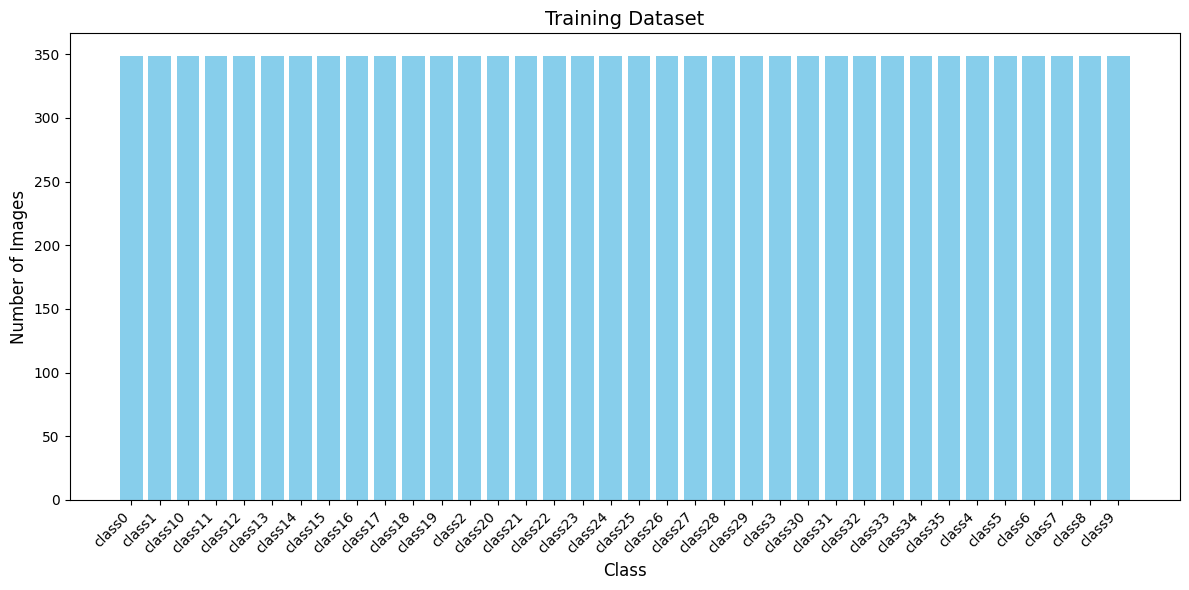

In [11]:
import os
import matplotlib.pyplot as plt

# Path to your training dataset
train_dir = "D:/dsds/train_augmented"

# Count images per class
class_counts = {}

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name, "images")
    if os.path.isdir(class_path):
        class_counts[class_name] = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])

# Sort the counts for better visualization
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[0]))

# Plot the chart
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Training Dataset", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()


## Augmentation Process for Val Dataset

In [12]:
# Example usage
if __name__ == "__main__":
    val_dir = "D:/dsds/val"
    balance_dataset(val_dir, target_count=105)

Creating augmented dataset in: D:/dsds\val_augmented
Target count per class: 105

Processing class 'class0' (76 images)
Augmented 'class0' to 105 images

Processing class 'class1' (96 images)
Augmented 'class1' to 105 images

Processing class 'class10' (59 images)
Augmented 'class10' to 105 images

Processing class 'class11' (90 images)
Augmented 'class11' to 105 images

Processing class 'class12' (55 images)
Augmented 'class12' to 105 images

Processing class 'class13' (43 images)
Augmented 'class13' to 105 images

Processing class 'class14' (46 images)
Augmented 'class14' to 105 images

Processing class 'class15' (105 images)
Augmented 'class15' to 105 images

Processing class 'class16' (39 images)
Augmented 'class16' to 105 images

Processing class 'class17' (79 images)
Augmented 'class17' to 105 images

Processing class 'class18' (82 images)
Augmented 'class18' to 105 images

Processing class 'class19' (82 images)
Augmented 'class19' to 105 images

Processing class 'class2' (100 im

## Plot Augmented Val Dataset

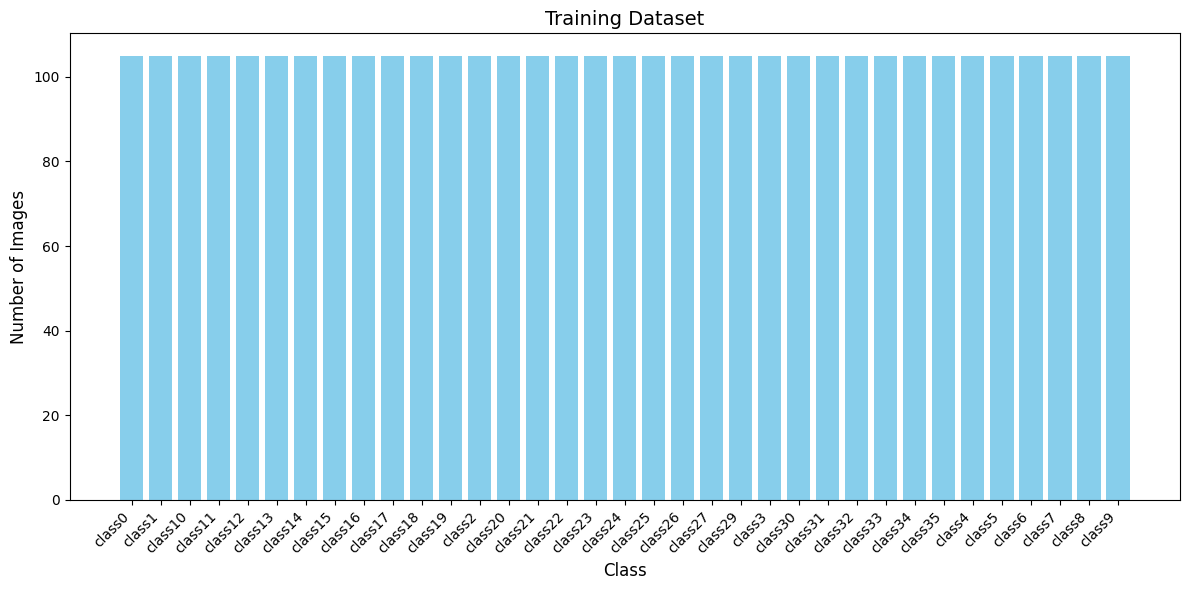

In [13]:
import os
import matplotlib.pyplot as plt

# Path to your training dataset
train_dir = "D:/dsds/val_augmented"

# Count images per class
class_counts = {}

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name, "images")
    if os.path.isdir(class_path):
        class_counts[class_name] = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])

# Sort the counts for better visualization
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[0]))

# Plot the chart
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Training Dataset", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()


## Verify if the Bounding Box from the Augmented images matches the labels

In [15]:
import os
import cv2
import random

def verify_random_images(image_dir, label_dir, num_samples=3, output_dir="verification_output"):
    """
    Randomly verify a few images and their labels by overlaying bounding boxes.
    
    Parameters:
        image_dir (str): Path to the directory containing images.
        label_dir (str): Path to the directory containing YOLO-format label files.
        num_samples (int): Number of images to verify.
        output_dir (str): Path to save images with bounding boxes overlaid (optional).
    """
    os.makedirs(output_dir, exist_ok=True)  # Create output directory
    
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if len(image_files) < num_samples:
        num_samples = len(image_files)
    
    # Randomly select images to verify
    selected_images = random.sample(image_files, num_samples)
    
    for image_file in selected_images:
        # Load the image
        image_path = os.path.join(image_dir, image_file)
        image = cv2.imread(image_path)
        height, width = image.shape[:2]
        
        # Load the corresponding label
        label_file = image_file.rsplit('.', 1)[0] + '.txt'
        label_path = os.path.join(label_dir, label_file)
        
        if not os.path.exists(label_path):
            print(f"Label file missing for {image_file}")
            continue
        
        with open(label_path, 'r') as f:
            lines = f.readlines()
        
        # Overlay bounding boxes
        valid_labels = True
        for line in lines:
            label = line.strip().split()
            try:
                class_id = int(label[0])
                x_center, y_center, box_width, box_height = map(float, label[1:])
            except ValueError:
                print(f"Invalid label format in {label_file}")
                valid_labels = False
                break
            
            # Convert YOLO format to pixel coordinates
            x1 = int((x_center - box_width / 2) * width)
            y1 = int((y_center - box_height / 2) * height)
            x2 = int((x_center + box_width / 2) * width)
            y2 = int((y_center + box_height / 2) * height)
            
            # Check for invalid bounding box coordinates
            if x1 < 0 or y1 < 0 or x2 > width or y2 > height:
                print(f"Bounding box out of bounds in {label_file}")
                valid_labels = False
                break
            
            # Draw rectangle and class label on the image
            color = (0, 255, 0)  # Green for bounding box
            cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
            cv2.putText(image, str(class_id), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
        
        if valid_labels:
            # Save the image with bounding boxes overlaid
            output_path = os.path.join(output_dir, image_file)
            cv2.imwrite(output_path, image)
            print(f"Verified {image_file}: Bounding boxes match.")
        else:
            print(f"Mismatch found in {image_file}.")
    
    print(f"\nVerification completed for {num_samples} images.")
    print(f"Visualized images saved in: {output_dir}")

# Example usage
image_dir = "D:/dsds/val_augmented/class0/images"
label_dir = "D:/dsds/val_augmented/class0/labels"
verify_random_images(image_dir, label_dir, num_samples=10)


Verified env_Balete-J-21-_JPG.rf.a6f6c7141325317767adfe04abad263e.jpg: Bounding boxes match.
Verified env_Balete-D-16-_jpg.rf.9afaf163b12a712ad78c99e1145ea8c1_aug_90_6.jpg: Bounding boxes match.
Verified env_Balete-FF-4-_jpg.rf.a178a16cd7768053a4d2161b55d5b635.jpg: Bounding boxes match.
Verified white_bg_Balete-B-36-_jpg.rf.311002fc82a07a0e10e9d7664faad644.jpg: Bounding boxes match.
Verified env_Balete-JJ-1-_jpg.rf.c33a2ba76c08ab4aa7b7f8a39ae44ce7_aug_180_25.jpg: Bounding boxes match.
Verified env_Balete-OO-1-_JPG.rf.7a26742974346940206355e729577343.jpg: Bounding boxes match.
Verified env_Balete-HH-3-_jpg.rf.204b009fc87b969bc41c562a139fed45.jpg: Bounding boxes match.
Verified env_Balete-O-27-_JPG.rf.c224d74606c063e2b0a00901696799b5.jpg: Bounding boxes match.
Verified env_Balete-DD-17-_jpg.rf.275d730a05ff357c5ba80ff81aba346f_aug_90_9.jpg: Bounding boxes match.
Verified env_Balete-R-43-_jpg.rf.cad4293155d19444e65abe9017408d8c.jpg: Bounding boxes match.

Verification completed for 10 imag

# For Zooming Factor

## Start Generating for training set

In [ ]:
import os
import random
from PIL import Image
from collections import defaultdict

def apply_zoom(image_path, label_path, zoom_factor, output_image_path, output_label_path):
    """
    Apply zoom augmentation to an image and its labels with improved bounding box adjustment
    
    Args:
    - image_path: Path to the input image
    - label_path: Path to the input label file
    - zoom_factor: Factor by which to zoom (> 1)
    - output_image_path: Path to save the zoomed image
    - output_label_path: Path to save the zoomed labels
    """
    # Load the image
    image = Image.open(image_path)
    img_width, img_height = image.size

    # Calculate crop dimensions for zoom
    crop_width = img_width / zoom_factor
    crop_height = img_height / zoom_factor
    left = (img_width - crop_width) / 2
    top = (img_height - crop_height) / 2
    right = left + crop_width
    bottom = top + crop_height

    # Crop and resize the image back to original dimensions
    cropped_image = image.crop((left, top, right, bottom))
    zoomed_image = cropped_image.resize((img_width, img_height), Image.LANCZOS)

    # Adjust bounding box labels
    zoomed_labels = []
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])

            # Convert normalized coordinates to pixel coordinates
            px_x_center = x_center * img_width
            px_y_center = y_center * img_height
            px_width = width * img_width
            px_height = height * img_height

            # Adjust pixel coordinates based on crop
            px_x_center = (px_x_center - left) * zoom_factor
            px_y_center = (px_y_center - top) * zoom_factor

            # Adjust pixel width and height
            px_width *= zoom_factor
            px_height *= zoom_factor

            # Convert back to normalized coordinates
            new_x_center = px_x_center / img_width
            new_y_center = px_y_center / img_height
            new_width = px_width / img_width
            new_height = px_height / img_height

            # Strictly enforce valid normalized coordinates
            new_x_center = max(0, min(1, new_x_center))
            new_y_center = max(0, min(1, new_y_center))
            new_width = max(0, min(1, new_width))
            new_height = max(0, min(1, new_height))

            # Ensure the entire bounding box is within image bounds
            if (new_x_center - new_width/2 >= 0 and 
                new_x_center + new_width/2 <= 1 and 
                new_y_center - new_height/2 >= 0 and 
                new_y_center + new_height/2 <= 1):
                # Add the modified label
                zoomed_labels.append(f"{class_id} {new_x_center:.6f} {new_y_center:.6f} {new_width:.6f} {new_height:.6f}")

    # Only save if we have valid labels
    if zoomed_labels:
        # Save the zoomed image and labels
        zoomed_image.save(output_image_path)
        with open(output_label_path, 'w') as f:
            f.writelines('\n'.join(zoomed_labels) + '\n')
        return True
    return False

def balance_dataset(base_path, target_count=350):
    """Balance all classes to have target_count images using zoom augmentation"""
    # Available zoom factors with more fine-grained progression
    zoom_factors = [round(x * 0.02 + 1.04, 2) for x in range(7)]  # [1.04, 1.06, 1.08, 1.10, 1.12, 1.14, 1.16]
    
    # Process each class directory
    class_dirs = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d)) and d.startswith('class')]
    
    for class_dir in class_dirs:
        class_path = os.path.join(base_path, class_dir)
        images_dir = os.path.join(class_path, 'images')
        labels_dir = os.path.join(class_path, 'labels')
        
        # Ensure directories exist
        os.makedirs(images_dir, exist_ok=True)
        os.makedirs(labels_dir, exist_ok=True)
        
        # Get list of original images (without zoom annotations)
        original_images = [f for f in os.listdir(images_dir) 
                         if f.endswith(('.jpg', '.jpeg', '.png')) and '(z' not in f]
        
        print(f"\nProcessing {class_dir}:")
        print(f"Original images: {len(original_images)}")
        
        current_count = len([f for f in os.listdir(images_dir) 
                           if f.endswith(('.jpg', '.jpeg', '.png'))])
        num_needed = max(0, target_count - current_count)
        
        print(f"Current total images: {current_count}")
        print(f"Additional images needed: {num_needed}")
        
        if num_needed == 0:
            print("No augmentation needed for this class")
            continue

        # Keep track of used zoom factors for each image
        used_zoom_factors = defaultdict(set)
        
        # Calculate maximum augmentations possible
        max_possible = len(original_images) * len(zoom_factors)
        if max_possible < num_needed:
            print(f"Warning: Can only generate {max_possible} unique augmentations "
                  f"({len(original_images)} images × {len(zoom_factors)} zoom factors)")
            num_needed = max_possible
        
        augmentations_created = 0
        attempts = 0
        max_attempts = num_needed * 20  # Increased attempts to account for potential rejections
        
        while augmentations_created < num_needed and attempts < max_attempts:
            attempts += 1
            
            # Get a random original image
            image_file = random.choice(original_images)
            
            # Get available zoom factors for this image
            available_factors = [f for f in zoom_factors 
                               if f not in used_zoom_factors[image_file]]
            
            if not available_factors:
                continue  # Skip if no available zoom factors for this image
                
            # Choose random zoom factor from available ones
            zoom_factor = random.choice(available_factors)
            used_zoom_factors[image_file].add(zoom_factor)
            
            # Setup paths
            label_file = os.path.splitext(image_file)[0] + '.txt'
            image_path = os.path.join(images_dir, image_file)
            label_path = os.path.join(labels_dir, label_file)
            
            # Verify label file exists
            if not os.path.exists(label_path):
                print(f"Warning: Label file not found for {image_file}")
                continue
            
            # Create output filenames with zoom factor
            base_name = os.path.splitext(image_file)[0]
            ext = os.path.splitext(image_file)[1]
            new_image_name = f"{base_name}(z{zoom_factor}){ext}"
            new_label_name = f"{base_name}(z{zoom_factor}).txt"
            
            output_image_path = os.path.join(images_dir, new_image_name)
            output_label_path = os.path.join(labels_dir, new_label_name)
            
            # Apply zoom augmentation
            if apply_zoom(image_path, label_path, zoom_factor, output_image_path, output_label_path):
                augmentations_created += 1
                if augmentations_created % 10 == 0:
                    print(f"Generated {augmentations_created}/{num_needed} augmented images")
            
        # Print statistics
        print(f"\nCompleted augmentation for {class_dir}")
        print(f"Total augmented images created: {augmentations_created}")
        print("\nZoom factors used per image:")
        for img, factors in used_zoom_factors.items():
            if factors:
                print(f"  {img}: {sorted(factors)}")

if __name__ == "__main__":
    # Path to your dataset directory containing class0, class1, etc.
    dataset_path = "dsds/train"  # Adjust this to your dataset path
    
    print("Starting dataset balancing...")
    balance_dataset(dataset_path)
    print("\nDataset balancing completed!")

## New Data Count for Train

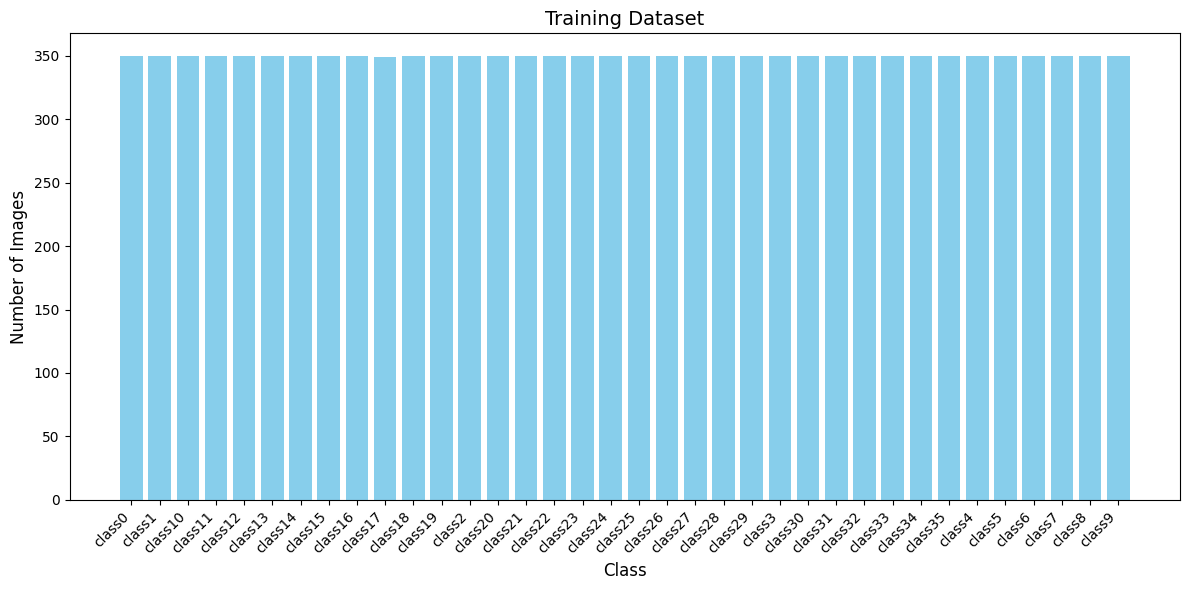

In [4]:
import os
import matplotlib.pyplot as plt

# Path to your training dataset
train_dir = "dsds/train"

# Count images per class
class_counts = {}

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name, "images")
    if os.path.isdir(class_path):
        class_counts[class_name] = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])

# Sort the counts for better visualization
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[0]))

# Plot the chart
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Training Dataset", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()


## Start Generating for validation set

In [ ]:
import os
import random
from PIL import Image
from collections import defaultdict

def apply_zoom(image_path, label_path, zoom_factor, output_image_path, output_label_path):
    """
    Apply zoom augmentation to an image and its labels with improved bounding box adjustment
    
    Args:
    - image_path: Path to the input image
    - label_path: Path to the input label file
    - zoom_factor: Factor by which to zoom (> 1)
    - output_image_path: Path to save the zoomed image
    - output_label_path: Path to save the zoomed labels
    """
    # Load the image
    image = Image.open(image_path)
    img_width, img_height = image.size

    # Calculate crop dimensions for zoom
    crop_width = img_width / zoom_factor
    crop_height = img_height / zoom_factor
    left = (img_width - crop_width) / 2
    top = (img_height - crop_height) / 2
    right = left + crop_width
    bottom = top + crop_height

    # Crop and resize the image back to original dimensions
    cropped_image = image.crop((left, top, right, bottom))
    zoomed_image = cropped_image.resize((img_width, img_height), Image.LANCZOS)

    # Adjust bounding box labels
    zoomed_labels = []
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])

            # Convert normalized coordinates to pixel coordinates
            px_x_center = x_center * img_width
            px_y_center = y_center * img_height
            px_width = width * img_width
            px_height = height * img_height

            # Adjust pixel coordinates based on crop
            px_x_center = (px_x_center - left) * zoom_factor
            px_y_center = (px_y_center - top) * zoom_factor

            # Adjust pixel width and height
            px_width *= zoom_factor
            px_height *= zoom_factor

            # Convert back to normalized coordinates
            new_x_center = px_x_center / img_width
            new_y_center = px_y_center / img_height
            new_width = px_width / img_width
            new_height = px_height / img_height

            # Strictly enforce valid normalized coordinates
            new_x_center = max(0, min(1, new_x_center))
            new_y_center = max(0, min(1, new_y_center))
            new_width = max(0, min(1, new_width))
            new_height = max(0, min(1, new_height))

            # Ensure the entire bounding box is within image bounds
            if (new_x_center - new_width/2 >= 0 and 
                new_x_center + new_width/2 <= 1 and 
                new_y_center - new_height/2 >= 0 and 
                new_y_center + new_height/2 <= 1):
                # Add the modified label
                zoomed_labels.append(f"{class_id} {new_x_center:.6f} {new_y_center:.6f} {new_width:.6f} {new_height:.6f}")

    # Only save if we have valid labels
    if zoomed_labels:
        # Save the zoomed image and labels
        zoomed_image.save(output_image_path)
        with open(output_label_path, 'w') as f:
            f.writelines('\n'.join(zoomed_labels) + '\n')
        return True
    return False

def balance_dataset(base_path, target_count=100):
    """Balance all classes to have target_count images using zoom augmentation"""
    # Available zoom factors with more fine-grained progression
    zoom_factors = [round(x * 0.02 + 1.04, 2) for x in range(7)]  # [1.04, 1.06, 1.08, 1.10, 1.12, 1.14, 1.16]
    
    # Process each class directory
    class_dirs = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d)) and d.startswith('class')]
    
    for class_dir in class_dirs:
        class_path = os.path.join(base_path, class_dir)
        images_dir = os.path.join(class_path, 'images')
        labels_dir = os.path.join(class_path, 'labels')
        
        # Ensure directories exist
        os.makedirs(images_dir, exist_ok=True)
        os.makedirs(labels_dir, exist_ok=True)
        
        # Get list of original images (without zoom annotations)
        original_images = [f for f in os.listdir(images_dir) 
                         if f.endswith(('.jpg', '.jpeg', '.png')) and '(z' not in f]
        
        print(f"\nProcessing {class_dir}:")
        print(f"Original images: {len(original_images)}")
        
        current_count = len([f for f in os.listdir(images_dir) 
                           if f.endswith(('.jpg', '.jpeg', '.png'))])
        num_needed = max(0, target_count - current_count)
        
        print(f"Current total images: {current_count}")
        print(f"Additional images needed: {num_needed}")
        
        if num_needed == 0:
            print("No augmentation needed for this class")
            continue

        # Keep track of used zoom factors for each image
        used_zoom_factors = defaultdict(set)
        
        # Calculate maximum augmentations possible
        max_possible = len(original_images) * len(zoom_factors)
        if max_possible < num_needed:
            print(f"Warning: Can only generate {max_possible} unique augmentations "
                  f"({len(original_images)} images × {len(zoom_factors)} zoom factors)")
            num_needed = max_possible
        
        augmentations_created = 0
        attempts = 0
        max_attempts = num_needed * 20  # Increased attempts to account for potential rejections
        
        while augmentations_created < num_needed and attempts < max_attempts:
            attempts += 1
            
            # Get a random original image
            image_file = random.choice(original_images)
            
            # Get available zoom factors for this image
            available_factors = [f for f in zoom_factors 
                               if f not in used_zoom_factors[image_file]]
            
            if not available_factors:
                continue  # Skip if no available zoom factors for this image
                
            # Choose random zoom factor from available ones
            zoom_factor = random.choice(available_factors)
            used_zoom_factors[image_file].add(zoom_factor)
            
            # Setup paths
            label_file = os.path.splitext(image_file)[0] + '.txt'
            image_path = os.path.join(images_dir, image_file)
            label_path = os.path.join(labels_dir, label_file)
            
            # Verify label file exists
            if not os.path.exists(label_path):
                print(f"Warning: Label file not found for {image_file}")
                continue
            
            # Create output filenames with zoom factor
            base_name = os.path.splitext(image_file)[0]
            ext = os.path.splitext(image_file)[1]
            new_image_name = f"{base_name}(z{zoom_factor}){ext}"
            new_label_name = f"{base_name}(z{zoom_factor}).txt"
            
            output_image_path = os.path.join(images_dir, new_image_name)
            output_label_path = os.path.join(labels_dir, new_label_name)
            
            # Apply zoom augmentation
            if apply_zoom(image_path, label_path, zoom_factor, output_image_path, output_label_path):
                augmentations_created += 1
                if augmentations_created % 10 == 0:
                    print(f"Generated {augmentations_created}/{num_needed} augmented images")
            
        # Print statistics
        print(f"\nCompleted augmentation for {class_dir}")
        print(f"Total augmented images created: {augmentations_created}")
        print("\nZoom factors used per image:")
        for img, factors in used_zoom_factors.items():
            if factors:
                print(f"  {img}: {sorted(factors)}")

if __name__ == "__main__":
    # Path to your dataset directory containing class0, class1, etc.
    dataset_path = "dsds/val"  # Adjust this to your dataset path
    
    print("Starting dataset balancing...")
    balance_dataset(dataset_path)
    print("\nDataset balancing completed!")

## New Data Count for Val

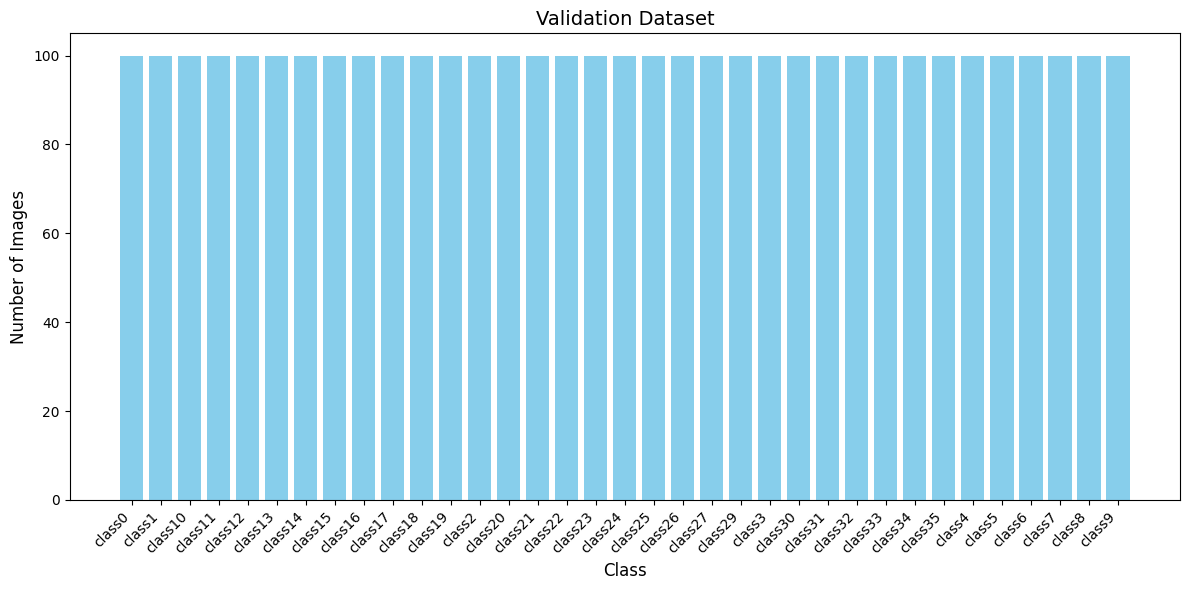

In [9]:
import os
import matplotlib.pyplot as plt

# Path to your training dataset
train_dir = "dsds/val"

# Count images per class
class_counts = {}

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name, "images")
    if os.path.isdir(class_path):
        class_counts[class_name] = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])

# Sort the counts for better visualization
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[0]))

# Plot the chart
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Validation Dataset", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
import os
import random

def cleanup_excess_images(base_path='dsds/val', target_count=100):
    """
    Randomly delete images and labels for classes that exceed the target count.
    
    Args:
    - base_path: Path to the dataset directory containing the validation dataset (default is 'dsds/val').
    - target_count: Maximum number of images allowed per class.
    """
    # Iterate through each class directory
    class_dirs = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

    for class_dir in class_dirs:
        class_path = os.path.join(base_path, class_dir)
        images_dir = os.path.join(class_path, 'images')
        labels_dir = os.path.join(class_path, 'labels')
        
        if not os.path.exists(images_dir) or not os.path.exists(labels_dir):
            print(f"Skipping {class_dir}: 'images' or 'labels' directory not found.")
            continue
        
        # Get list of all images
        all_images = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]
        current_count = len(all_images)
        
        print(f"\nProcessing {class_dir}:")
        print(f"Current image count: {current_count}")
        
        if current_count > target_count:
            num_to_delete = current_count - target_count
            print(f"Need to delete {num_to_delete} images.")
            
            # Prefer deleting augmented images first (identified by patterns like '(z' in filename)
            augmented_images = [img for img in all_images if '(z' in img]
            deletion_candidates = augmented_images if augmented_images else all_images
            
            # Randomly select images to delete
            images_to_delete = random.sample(deletion_candidates, num_to_delete)
            
            # Delete selected images and their corresponding labels
            for image_to_delete in images_to_delete:
                # Remove image
                image_path = os.path.join(images_dir, image_to_delete)
                os.remove(image_path)
                
                # Remove corresponding label
                label_name = os.path.splitext(image_to_delete)[0] + '.txt'
                label_path = os.path.join(labels_dir, label_name)
                if os.path.exists(label_path):
                    os.remove(label_path)
            
            # Verify final count
            remaining_images = len([f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))])
            print(f"Images after cleanup: {remaining_images}")
        else:
            print(f"No deletion required for {class_dir}.")

# Call the function
cleanup_excess_images(base_path='dsds/val', target_count=100)


## Val Data Count After Cleanup

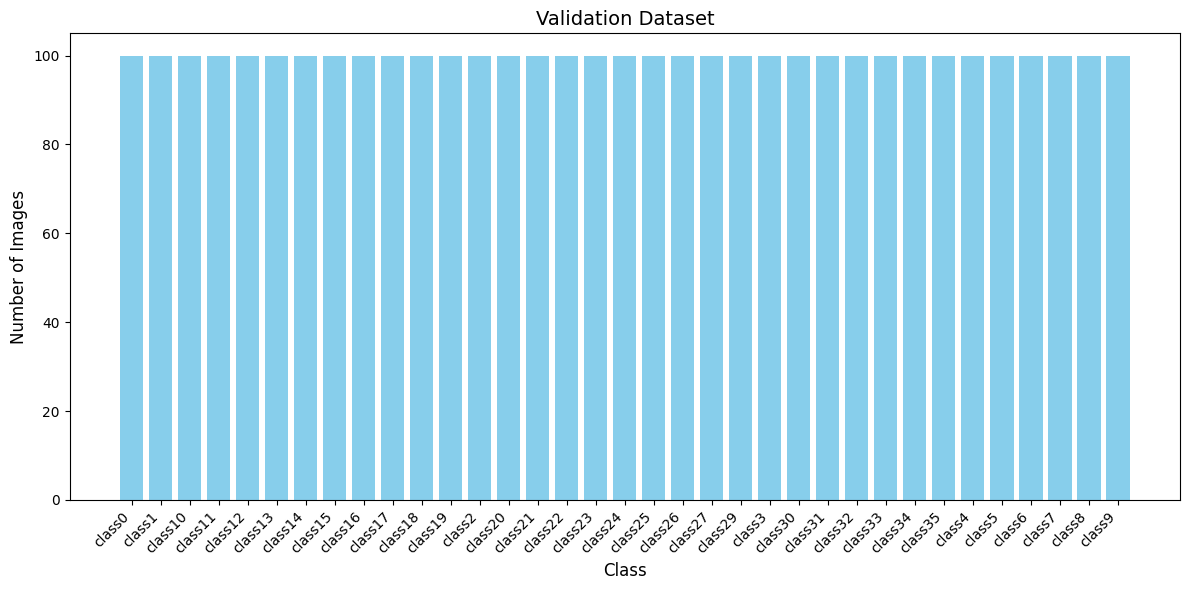

In [13]:
import os
import matplotlib.pyplot as plt

# Path to your training dataset
train_dir = "dsds/val"

# Count images per class
class_counts = {}

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name, "images")
    if os.path.isdir(class_path):
        class_counts[class_name] = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])

# Sort the counts for better visualization
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[0]))

# Plot the chart
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
plt.xlabel("Class", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Validation Dataset", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()


## Plot Random Samples from Train

Plotting random samples from the dataset...


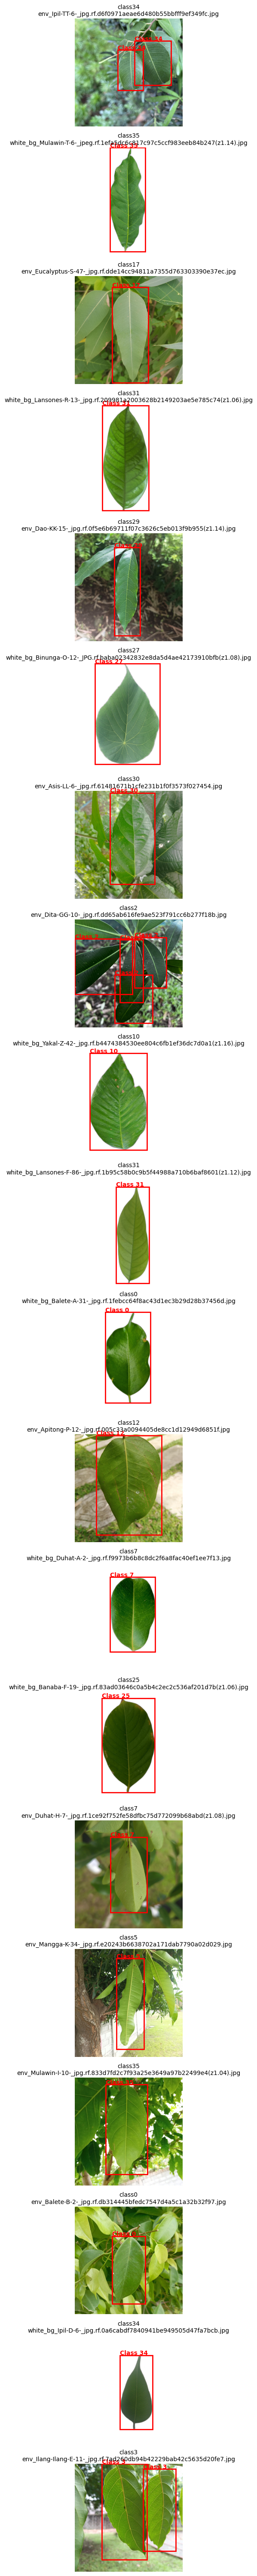

Done!


In [16]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def plot_image_with_boxes(image_path, label_path, ax, title):
    """Plot an image with its bounding boxes and title"""
    # Load image
    image = Image.open(image_path)
    img_width, img_height = image.size

    # Plot image
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(title, fontsize=10, wrap=True)

    # Read and plot bounding boxes
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                class_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:])

                # Convert YOLO format to corner coordinates
                x_min = (x_center - width / 2) * img_width
                y_min = (y_center - height / 2) * img_height
                box_width = width * img_width
                box_height = height * img_height

                # Draw bounding box
                rect = patches.Rectangle(
                    (x_min, y_min), box_width, box_height,
                    linewidth=2, edgecolor='r', facecolor='none'
                )
                ax.add_patch(rect)
                ax.text(x_min, y_min - 5, f"Class {class_id}", 
                        color='red', fontsize=10, weight='bold')

def plot_random_dataset_samples(base_path, num_samples=20, figsize=(3, 3)):
    """Plot random samples from the dataset in a single column"""
    # Get all class directories
    class_dirs = [d for d in os.listdir(base_path) if d.startswith('class')]
    
    # Collect all image paths and their corresponding label paths
    all_images = []
    for class_dir in class_dirs:
        images_dir = os.path.join(base_path, class_dir, 'images')
        labels_dir = os.path.join(base_path, class_dir, 'labels')
        
        for image_file in os.listdir(images_dir):
            if image_file.endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(images_dir, image_file)
                label_path = os.path.join(labels_dir, 
                                        os.path.splitext(image_file)[0] + '.txt')
                all_images.append((image_path, label_path, class_dir))
    
    # Randomly select images
    selected_images = random.sample(all_images, min(num_samples, len(all_images)))
    
    # Create subplot grid for a single column
    num_rows = len(selected_images)
    fig, axs = plt.subplots(num_rows, 1, figsize=(figsize[0], num_rows * figsize[1]))
    
    if num_rows == 1:  # Handle case where only one sample is selected
        axs = [axs]
    
    # Plot each selected image
    for i, (image_path, label_path, class_dir) in enumerate(selected_images):
        # Create title from filename and class
        filename = os.path.basename(image_path)
        title = f"{class_dir}\n{filename}"
        
        # Plot image with boxes
        plot_image_with_boxes(image_path, label_path, axs[i], title)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Path to your dataset directory containing class0, class1, etc.
    dataset_path = "dsds/train"  # Adjust this to your dataset path
    
    print("Plotting random samples from the dataset...")
    plot_random_dataset_samples(dataset_path, num_samples=20)
    print("Done!")


## Plot Random Samples from Val

Plotting random samples from the dataset...


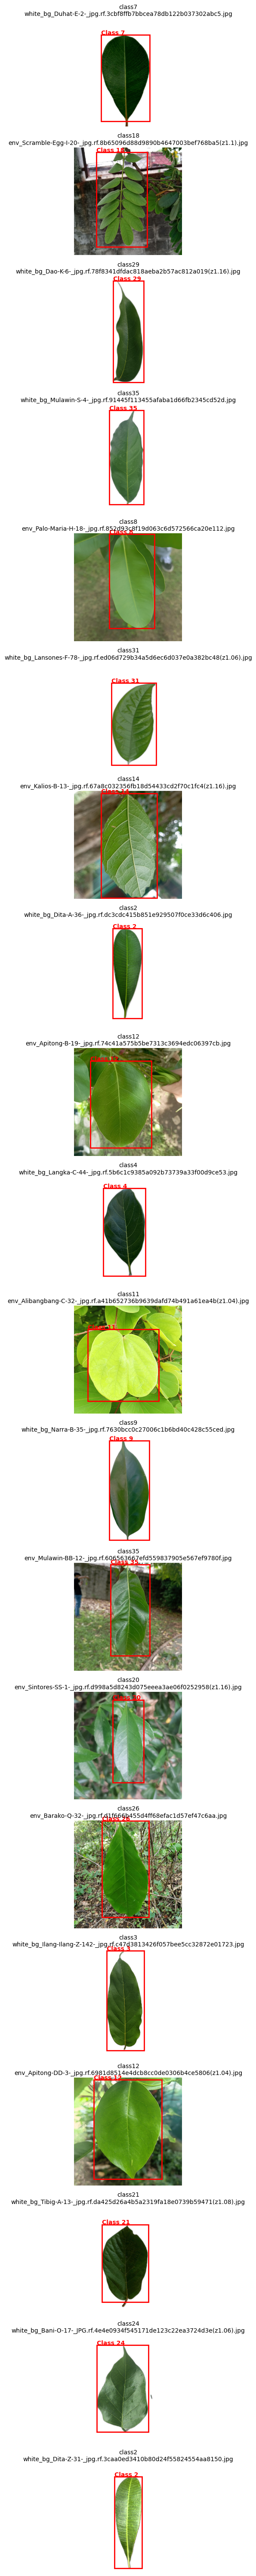

Done!


In [15]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def plot_image_with_boxes(image_path, label_path, ax, title):
    """Plot an image with its bounding boxes and title"""
    # Load image
    image = Image.open(image_path)
    img_width, img_height = image.size

    # Plot image
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(title, fontsize=10, wrap=True)

    # Read and plot bounding boxes
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                class_id = int(parts[0])
                x_center, y_center, width, height = map(float, parts[1:])

                # Convert YOLO format to corner coordinates
                x_min = (x_center - width / 2) * img_width
                y_min = (y_center - height / 2) * img_height
                box_width = width * img_width
                box_height = height * img_height

                # Draw bounding box
                rect = patches.Rectangle(
                    (x_min, y_min), box_width, box_height,
                    linewidth=2, edgecolor='r', facecolor='none'
                )
                ax.add_patch(rect)
                ax.text(x_min, y_min - 5, f"Class {class_id}", 
                        color='red', fontsize=10, weight='bold')

def plot_random_dataset_samples(base_path, num_samples=20, figsize=(3, 3)):
    """Plot random samples from the dataset in a single column"""
    # Get all class directories
    class_dirs = [d for d in os.listdir(base_path) if d.startswith('class')]
    
    # Collect all image paths and their corresponding label paths
    all_images = []
    for class_dir in class_dirs:
        images_dir = os.path.join(base_path, class_dir, 'images')
        labels_dir = os.path.join(base_path, class_dir, 'labels')
        
        for image_file in os.listdir(images_dir):
            if image_file.endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(images_dir, image_file)
                label_path = os.path.join(labels_dir, 
                                        os.path.splitext(image_file)[0] + '.txt')
                all_images.append((image_path, label_path, class_dir))
    
    # Randomly select images
    selected_images = random.sample(all_images, min(num_samples, len(all_images)))
    
    # Create subplot grid for a single column
    num_rows = len(selected_images)
    fig, axs = plt.subplots(num_rows, 1, figsize=(figsize[0], num_rows * figsize[1]))
    
    if num_rows == 1:  # Handle case where only one sample is selected
        axs = [axs]
    
    # Plot each selected image
    for i, (image_path, label_path, class_dir) in enumerate(selected_images):
        # Create title from filename and class
        filename = os.path.basename(image_path)
        title = f"{class_dir}\n{filename}"
        
        # Plot image with boxes
        plot_image_with_boxes(image_path, label_path, axs[i], title)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Path to your dataset directory containing class0, class1, etc.
    dataset_path = "dsds/val"  # Adjust this to your dataset path
    
    print("Plotting random samples from the dataset...")
    plot_random_dataset_samples(dataset_path, num_samples=20)
    print("Done!")


## Plot Specific Images

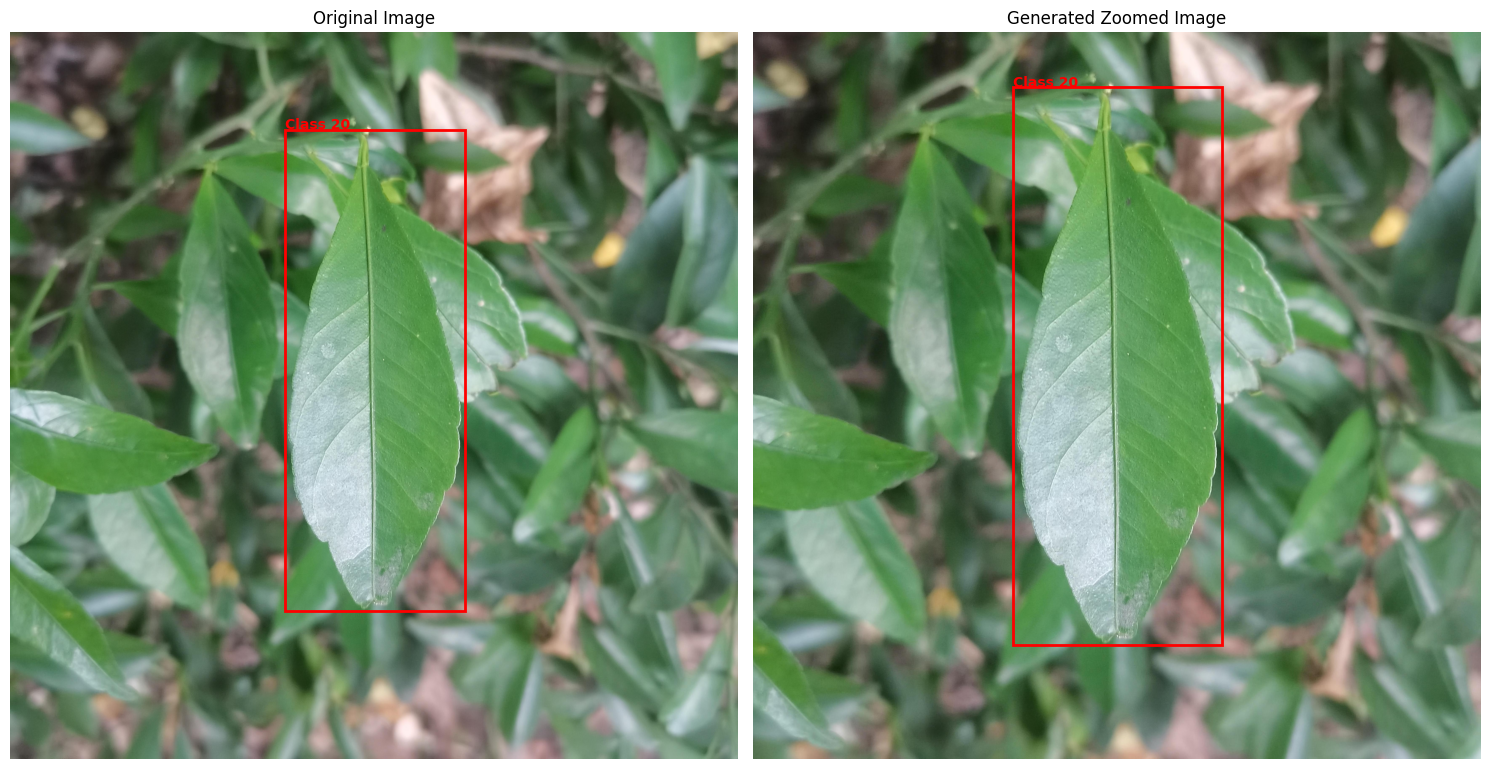

In [18]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to plot image with bounding boxes and original image side by side
def plot_original_and_zoomed(original_image_path, zoomed_image_path, original_label_path, zoomed_label_path):
    # Load images
    original_image = Image.open(original_image_path)
    zoomed_image = Image.open(zoomed_image_path)
    img_width, img_height = zoomed_image.size

    # Create a figure with two subplots for the original and zoomed images
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))

    # Plot the original image
    axs[0].imshow(original_image)
    axs[0].axis('off')
    axs[0].set_title("Original Image")

    # Plot the zoomed image with bounding boxes
    axs[1].imshow(zoomed_image)
    axs[1].axis('off')
    axs[1].set_title("Generated Zoomed Image")

    # Read and plot bounding boxes for the original image
    with open(original_label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])

            # Convert YOLO format to corner coordinates
            x_min = (x_center - width / 2) * img_width
            y_min = (y_center - height / 2) * img_height
            x_max = (x_center + width / 2) * img_width
            y_max = (y_center + height / 2) * img_height

            # Draw bounding box on the original image
            rect = patches.Rectangle(
                (x_min, y_min), x_max - x_min, y_max - y_min,
                linewidth=2, edgecolor='r', facecolor='none'
            )
            axs[0].add_patch(rect)
            axs[0].text(x_min, y_min - 5, f"Class {class_id}", color='red', fontsize=10, weight='bold')

    # Read and plot bounding boxes for the zoomed image
    with open(zoomed_label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])

            # Convert YOLO format to corner coordinates
            x_min = (x_center - width / 2) * img_width
            y_min = (y_center - height / 2) * img_height
            x_max = (x_center + width / 2) * img_width
            y_max = (y_center + height / 2) * img_height

            # Draw bounding box on the zoomed image
            rect = patches.Rectangle(
                (x_min, y_min), x_max - x_min, y_max - y_min,
                linewidth=2, edgecolor='r', facecolor='none'
            )
            axs[1].add_patch(rect)
            axs[1].text(x_min, y_min - 5, f"Class {class_id}", color='red', fontsize=10, weight='bold')

    plt.tight_layout()
    plt.show()

# File paths
original_image_path = "dsds/val/class20/images/env_Sintores-SS-1-_jpg.rf.d998a5d8243d075eeea3ae06f0252958.jpg"
zoomed_image_path = "dsds/val/class20/images/env_Sintores-SS-1-_jpg.rf.d998a5d8243d075eeea3ae06f0252958(z1.16).jpg"
original_label_path = "dsds/val/class20/labels/env_Sintores-SS-1-_jpg.rf.d998a5d8243d075eeea3ae06f0252958.txt"
zoomed_label_path = "dsds/val/class20/labels/env_Sintores-SS-1-_jpg.rf.d998a5d8243d075eeea3ae06f0252958(z1.16).txt"

# Plot the original and zoomed images with bounding boxes
plot_original_and_zoomed(original_image_path, zoomed_image_path, original_label_path, zoomed_label_path)


## Restructure Data for Training

In [11]:
import os
import shutil

# Source and destination paths
source_dir = "dsds"
dest_dir = "Augmented_Dataset"

def copy_files(source, destination):
    if not os.path.exists(destination):
        os.makedirs(destination)

    for root, _, files in os.walk(source):
        for file in files:
            file_path = os.path.join(root, file)
            shutil.copy(file_path, destination)

# Paths for train and val datasets
train_images_dest = os.path.join(dest_dir, "train", "images")
train_labels_dest = os.path.join(dest_dir, "train", "labels")
val_images_dest = os.path.join(dest_dir, "val", "images")
val_labels_dest = os.path.join(dest_dir, "val", "labels")

# Function to copy images and labels
print("Copying training images and labels...")
for class_idx in range(36):
    class_path = f"class{class_idx}"
    copy_files(os.path.join(source_dir, "train", class_path, "images"), train_images_dest)
    copy_files(os.path.join(source_dir, "train", class_path, "labels"), train_labels_dest)

print("Copying validation images and labels...")
for class_idx in range(36):
    class_path = f"class{class_idx}"
    copy_files(os.path.join(source_dir, "val", class_path, "images"), val_images_dest)
    copy_files(os.path.join(source_dir, "val", class_path, "labels"), val_labels_dest)

print("Dataset reorganization complete.")


Copying training images and labels...
Copying validation images and labels...
Dataset reorganization complete.


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # Load a pretrained model (recommended for training)

# Define the path to the dataset YAML file
train_results = model.train(data="C://Users//ben//Documents//augment_labels/data.yaml", epochs=50, imgsz=640, device=0)

